In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [30]:
## Load the data set    
data = pd.read_csv('data.csv');
print(data.head())

   Salary  Age  Eligible
0      59   18         0
1      47   25         0
2      62   26         1
3      80   21         0
4      45   28         0


In [31]:
# Load the feature and target variables
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

print(X)

[[59 18]
 [47 25]
 [62 26]
 [80 21]
 [45 28]
 [45 34]
 [81 48]
 [65 31]
 [40 32]
 [60 29]
 [40 18]
 [40 29]
 [54 30]
 [20 54]
 [20 28]
 [38 33]
 [29 29]
 [56 18]
 [31 41]
 [21 37]
 [79 37]
 [45 20]
 [51 44]
 [21 18]
 [39 35]
 [52 51]
 [26 20]
 [57 24]
 [37 30]
 [44 24]
 [37 18]
 [87 30]
 [49 19]
 [28 34]
 [66 20]
 [25 45]
 [54 22]
 [20 26]
 [23 38]
 [53 18]
 [64 32]
 [53 43]
 [47 18]
 [43 31]
 [20 32]
 [35 37]
 [40 18]
 [71 18]
 [56 35]
 [20 32]
 [56 32]
 [42 33]
 [36 23]
 [62 32]
 [70 32]
 [68 22]
 [33 48]
 [43 34]
 [56 18]
 [69 36]
 [40 20]
 [46 37]
 [27 41]
 [26 21]
 [66 39]
 [77 34]
 [48 38]
 [70 48]
 [57 27]
 [37 22]
 [57 21]
 [80 21]
 [49 29]
 [81 33]
 [20 32]
 [66 38]
 [51 30]
 [44 44]
 [51 27]
 [20 57]
 [45 36]
 [57 21]
 [79 19]
 [39 34]
 [33 27]
 [39 37]
 [68 34]
 [56 29]
 [39 21]
 [60 18]
 [51 25]
 [69 38]
 [35 32]
 [43 18]
 [42 31]
 [20 33]
 [55 21]
 [55 31]
 [50 30]
 [45 18]]


### Adding Bias
- np.ones((X.shape[0], 1)):

This creates a column vector of ones with the same number of rows as X. Each row corresponds to a data point in X.
The column of ones represents the bias term, which allows the model to learn an offset in the decision boundary.

- np.hstack((..., X)):

The np.hstack function horizontally stacks the column of ones (bias term) with the original input data X.
This effectively adds the bias term as the first column of the input data.
X_bias:

The resulting X_bias is a 2D NumPy array where each row is a vector representing a data point, and the first element of each vector is the bias term (1).

In [49]:
X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
print('x_bias', X_bias)

# Initialize weights
weights = np.random.rand(X_bias.shape[1]) * 0.01
print('weights', weights)


x_bias [[ 1. 59. 18.]
 [ 1. 47. 25.]
 [ 1. 62. 26.]
 [ 1. 80. 21.]
 [ 1. 45. 28.]
 [ 1. 45. 34.]
 [ 1. 81. 48.]
 [ 1. 65. 31.]
 [ 1. 40. 32.]
 [ 1. 60. 29.]
 [ 1. 40. 18.]
 [ 1. 40. 29.]
 [ 1. 54. 30.]
 [ 1. 20. 54.]
 [ 1. 20. 28.]
 [ 1. 38. 33.]
 [ 1. 29. 29.]
 [ 1. 56. 18.]
 [ 1. 31. 41.]
 [ 1. 21. 37.]
 [ 1. 79. 37.]
 [ 1. 45. 20.]
 [ 1. 51. 44.]
 [ 1. 21. 18.]
 [ 1. 39. 35.]
 [ 1. 52. 51.]
 [ 1. 26. 20.]
 [ 1. 57. 24.]
 [ 1. 37. 30.]
 [ 1. 44. 24.]
 [ 1. 37. 18.]
 [ 1. 87. 30.]
 [ 1. 49. 19.]
 [ 1. 28. 34.]
 [ 1. 66. 20.]
 [ 1. 25. 45.]
 [ 1. 54. 22.]
 [ 1. 20. 26.]
 [ 1. 23. 38.]
 [ 1. 53. 18.]
 [ 1. 64. 32.]
 [ 1. 53. 43.]
 [ 1. 47. 18.]
 [ 1. 43. 31.]
 [ 1. 20. 32.]
 [ 1. 35. 37.]
 [ 1. 40. 18.]
 [ 1. 71. 18.]
 [ 1. 56. 35.]
 [ 1. 20. 32.]
 [ 1. 56. 32.]
 [ 1. 42. 33.]
 [ 1. 36. 23.]
 [ 1. 62. 32.]
 [ 1. 70. 32.]
 [ 1. 68. 22.]
 [ 1. 33. 48.]
 [ 1. 43. 34.]
 [ 1. 56. 18.]
 [ 1. 69. 36.]
 [ 1. 40. 20.]
 [ 1. 46. 37.]
 [ 1. 27. 41.]
 [ 1. 26. 21.]
 [ 1. 66. 39.]
 [ 1. 77. 34.]
 [ 

In [56]:
# Hyperparameters
learning_rate = 0.1
epochs = 500

# Initialize weights randomly
weights = np.random.rand(X_bias.shape[1]) * 0.01

# Perceptron training
for epoch in range(epochs):
    errors = 0
    for i in range(len(X_bias)):
        activation = np.dot(X_bias[i], weights)
        prediction = 1 if activation >= 0 else 0
        error = y[i] - prediction
        weights += learning_rate * error * X_bias[i]
        errors += abs(error)
    if errors == 0:
        print(f"Converged after {epoch + 1} epochs")
        break

print('Final weights:', weights)


Final weights: [-3.31295410e+02  3.30253994e+00  2.08847891e-01]


### Visulization

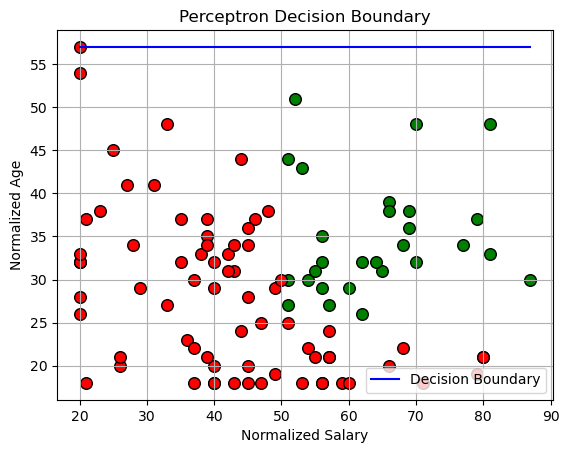

In [61]:
for i in range(len(y)):
    color = 'green' if y[i] == 1 else 'red'
    plt.scatter(X[i][0], X[i][1], color=color, edgecolor='k', s=70)


# Calculate and plot the decision boundary within the range of the data
x_min, x_max = X[:, 0].min(), X[:, 0].max()  # Use the range of the first feature (salary)
x_values = np.linspace(x_min, x_max, 100)  # Generate x values for the line
y_values = -(weights[0] / weights[2]) - (weights[1] / weights[2]) * x_values  # Calculate y values

# Clip y_values to ensure they are within the range of the second feature (age)
y_min, y_max = X[:, 1].min(), X[:, 1].max()
y_values = np.clip(y_values, y_min, y_max)

# Plot the decision boundary
plt.plot(x_values, y_values, color='blue', label='Decision Boundary')

# Add labels, title, legend, and grid
plt.xlabel("Normalized Salary")
plt.ylabel("Normalized Age")
plt.title("Perceptron Decision Boundary")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()